In [1]:
cd ../analysis/

/home/jlee782/final_segmentation/analysis


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from withClustAnalysis import *
from PixelEM import * 

Populating the interactive namespace from numpy and matplotlib


/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [66]:
# Pick best clusters for each object sample based on MV
best_clust_df = best_worker_picking()
clustObj=clust_df.objid.unique()

In [97]:
# MV = pd.read_csv("pixel_em/MV_full_PRJ_table.csv") 

In [98]:
# Pick best clusters for each object sample based on MV
best_clust_df = best_worker_picking()

In [99]:
df = pd.read_csv("pixel_em/MV_full_PRJ_table.csv")
df = filter_best_clust(df,best_clust_df)
df = df.rename(columns={"precision":"P [MV]",
                       "recall":"R [MV]",
                       "jaccard":"J [MV]",
                       "FPR%":"FPR% [MV]",
                       "FNR%":"FNR% [MV]"})
df = df.drop(["thresh"],axis=1)
df= df[((df["clust"]==-1) &(df["objid"].isin(noClust_obj)))|((df["clust"]!=-1) & df["objid"].isin(clustObj))]
gt =""
# print len(df)
for mode in ["basic","GT","isoGT","GTLSA","isoGTLSA"]:
    data =  pd.read_csv("pixel_em/{}{}_full_PRJ_table.csv".format(gt,mode))
    data = data.rename(columns={"precision":"P [{}]".format(mode),
                           "recall":"R [{}]".format(mode),
                           "jaccard":"J [{}]".format(mode),
                           "FPR%":"FPR% [{}]".format(mode),
                           "FNR%":"FNR% [{}]".format(mode)})
    data = data.drop(["thresh"],axis=1)
    data = filter_best_clust(data,best_clust_df)
    assert len(df)==31*44
    df = df.merge(data,on=['clust', 'num_workers', 'objid','sample_num'],how="outer")


In [100]:
df["sample"]=df.apply(lambda x: "{}workers_rand{}".format(int(x["num_workers"]),int(x["sample_num"])),axis=1)
assert pd.isnull(df).sum().sum()==0

In [101]:
df.to_csv("all_algo_data.csv")

# Picking out poorly performing objects from Greedy EM 

In [102]:
df["J [GTLSA-MV]"]=df["J [GTLSA]"]-df["J [MV]"]
df["J [GTLSA-MV]"] = df["J [GTLSA-MV]"]#.abs()

In [103]:
df[(df["J [GTLSA-MV]"]>0.001)].head()

,num_workers,sample_num,objid,clust,P [MV],R [MV],J [MV],FPR% [MV],FNR% [MV],P [basic],...,J [GTLSA],FPR% [GTLSA],FNR% [GTLSA],P [isoGTLSA],R [isoGTLSA],J [isoGTLSA],FPR% [isoGTLSA],FNR% [isoGTLSA],sample,J [GTLSA-MV]
2,25,0,3,-1,0.954869,0.916754,0.878681,0.054385,8.324580,0.954869,...,0.880605,0.053396,8.193277,0.955714,0.918067,0.880605,0.053396,8.193277,25workers_rand0,0.001923
3,25,0,4,0,0.946651,0.946364,0.898446,0.057914,5.363636,0.946651,...,0.901729,0.055939,5.181818,0.948469,0.948182,0.901729,0.055939,5.181818,25workers_rand0,0.003283
4,25,0,5,-1,0.959258,0.907138,0.873484,0.051460,9.286244,0.959258,...,0.874822,0.050470,9.212151,0.960042,0.907878,0.874822,0.050470,9.212151,25workers_rand0,0.001338
7,25,0,8,0,0.950728,0.916116,0.874592,0.433177,8.388375,0.950728,...,0.876471,0.423606,8.283472,0.951816,0.917165,0.876471,0.423606,8.283472,25workers_rand0,0.001879
20,25,0,21,0,0.985480,0.937469,0.924697,0.029970,6.253139,0.985480,...,0.928784,0.026155,6.002009,0.987338,0.939980,0.928784,0.026155,6.002009,25workers_rand0,0.004088


In [104]:
df["J [GT-MV]"]=df["J [GT]"]-df["J [MV]"]
df["J [GT-MV]"] = df["J [GT-MV]"]#.abs()
df[(df["J [GT-MV]"]>0.001)].head()

,num_workers,sample_num,objid,clust,P [MV],R [MV],J [MV],FPR% [MV],FNR% [MV],P [basic],...,FPR% [GTLSA],FNR% [GTLSA],P [isoGTLSA],R [isoGTLSA],J [isoGTLSA],FPR% [isoGTLSA],FNR% [isoGTLSA],sample,J [GTLSA-MV],J [GT-MV]
32,25,0,33,0,0.968054,0.994450,0.962852,0.396411,0.555033,0.969054,...,0.396045,0.552000,0.968084,0.994480,0.962910,0.396045,0.552000,25workers_rand0,0.000058,0.001043
1044,30,0,33,0,0.969298,0.993934,0.963598,0.380291,0.606594,0.968873,...,0.376994,0.579297,0.969564,0.994207,0.964118,0.376994,0.579297,30workers_rand0,0.000520,0.001227
1083,25,1,28,0,0.898650,0.940326,0.850165,0.434179,5.967420,0.898967,...,0.430776,5.884309,0.899444,0.941157,0.851557,0.430776,5.884309,25workers_rand1,0.001391,0.001199


In [105]:
df["J [basic-MV]"]=df["J [basic]"]-df["J [MV]"]
df["J [isoGT-MV]"]=df["J [isoGT]"]-df["J [MV]"]
df["J [isoGTLSA-MV]"]=df["J [isoGTLSA]"]-df["J [MV]"]

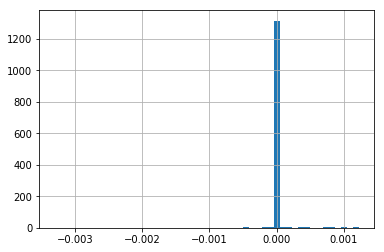

In [106]:
df["J [GT-MV]"].hist(bins=50)

# They all follow very closely with MV, let's look at where both of them fail

In [123]:
task_ambiguity = [1,4,35,40,41,42]
small_area = [15,11,12,22]
high_numPts=[5,7,9,10,11,12,28,29,30,37]


In [108]:
metric_diffJ=["J [GTLSA-MV]","J [GT-MV]","J [basic-MV]","J [isoGT-MV]","J [isoGTLSA-MV]"]

In [109]:
df[(df[metric_diffJ].mean(axis=1)<0)].groupby("sample")[metric_diffJ].count()

,J [GTLSA-MV],J [GT-MV],J [basic-MV],J [isoGT-MV],J [isoGTLSA-MV]
sample,,,,,
10workers_rand0,22,22,22,22,22
10workers_rand1,19,19,19,19,19
10workers_rand2,18,18,18,18,18
10workers_rand3,27,27,27,27,27
10workers_rand4,18,18,18,18,18
10workers_rand5,24,24,24,24,24
10workers_rand6,23,23,23,23,23
10workers_rand7,15,15,15,15,15
15workers_rand0,22,22,22,22,22


In [110]:
df[(df[metric_diffJ].mean(axis=1)<-0.01)]#.groupby("sample")[metric_diffJ].count()

,num_workers,sample_num,objid,clust,P [MV],R [MV],J [MV],FPR% [MV],FNR% [MV],P [basic],...,R [isoGTLSA],J [isoGTLSA],FPR% [isoGTLSA],FNR% [isoGTLSA],sample,J [GTLSA-MV],J [GT-MV],J [basic-MV],J [isoGT-MV],J [isoGTLSA-MV]
54,5,8,11,-1,0.886679,0.910272,0.815410,0.061393,8.972772,0.886679,...,0.903465,0.780331,0.083272,9.653465,5workers_rand8,-0.008491,0,0,-0.035079,-0.035079
130,5,9,46,-1,0.956540,0.934004,0.895982,0.115780,6.599614,0.956540,...,0.923533,0.875294,0.150364,7.646735,5workers_rand9,-0.009376,0,0,-0.020688,-0.020688
131,5,9,47,2,0.887471,0.970402,0.864081,0.107414,2.959831,0.887471,...,0.950529,0.831976,0.124393,4.947146,5workers_rand9,-0.005978,0,0,-0.032105,-0.032105
216,5,7,44,-1,0.944717,0.933553,0.885195,0.214485,6.644711,0.944717,...,0.921736,0.865327,0.255936,7.826424,5workers_rand7,-0.019868,0,0,-0.019868,-0.019868
219,5,7,47,2,0.898230,0.944186,0.852941,0.093387,5.581395,0.898230,...,0.932770,0.836240,0.100770,6.723044,5workers_rand7,-0.022802,0,0,-0.016702,-0.016702
227,5,4,8,0,0.934583,0.928083,0.871470,0.592693,7.191701,0.934583,...,0.920040,0.851952,0.729169,7.995959,5workers_rand4,-0.019518,0,0,-0.019518,-0.019518
244,5,4,25,0,0.956993,0.978449,0.937237,0.556702,2.155116,0.956993,...,0.951271,0.890740,0.860357,4.872909,5workers_rand4,-0.043410,0,0,-0.046497,-0.046497
275,5,5,12,-1,0.922711,0.969062,0.896308,0.080044,3.093812,0.922711,...,0.962076,0.867166,0.107928,3.792415,5workers_rand5,-0.029141,0,0,-0.029141,-0.029141
280,5,5,17,-1,0.881059,0.929523,0.825888,0.157690,7.047701,0.881059,...,0.936829,0.813129,0.191173,6.317147,5workers_rand5,-0.030031,0,0,-0.012758,-0.012758
307,5,5,47,0,0.923342,0.906554,0.843099,0.065703,9.344609,0.923342,...,0.894292,0.814715,0.085267,10.570825,5workers_rand5,-0.054329,0,0,-0.028384,-0.028384


In [125]:
small_area

[15, 11, 12, 22]

In [126]:
df[(df["objid"].isin(small_area))&(df[metric_J].mean(axis=1)<0.8)]

,num_workers,sample_num,objid,clust,P [MV],R [MV],J [MV],FPR% [MV],FNR% [MV],P [basic],...,R [isoGTLSA],J [isoGTLSA],FPR% [isoGTLSA],FNR% [isoGTLSA],sample,J [GTLSA-MV],J [GT-MV],J [basic-MV],J [isoGT-MV],J [isoGTLSA-MV]
58,5,8,15,0,0.833046,0.952756,0.800000,0.031628,4.724409,0.833046,...,0.952756,0.800000,0.031628,4.724409,5workers_rand8,0.000000,0,0,0.000000,0.000000
102,5,9,15,0,0.811545,0.940945,0.772213,0.036193,5.905512,0.811545,...,0.940945,0.774716,0.035541,5.905512,5workers_rand9,-0.017496,0,0,0.002503,0.002503
190,5,7,15,0,0.853748,0.919291,0.794218,0.026085,8.070866,0.853748,...,0.919291,0.794218,0.026085,8.070866,5workers_rand7,0.000000,0,0,0.000000,0.000000
278,5,5,15,0,0.760606,0.988189,0.753754,0.051517,1.181102,0.760606,...,0.988189,0.753754,0.051517,1.181102,5workers_rand5,0.000000,0,0,0.000000,0.000000
318,5,2,11,-1,0.864516,0.912129,0.798051,0.075435,8.787129,0.864516,...,0.912129,0.795896,0.077068,8.787129,5workers_rand2,0.000420,0,0,-0.002155,-0.002155
362,5,3,11,-1,0.840539,0.926361,0.787895,0.092743,7.363861,0.840539,...,0.926361,0.787895,0.092743,7.363861,5workers_rand3,0.000000,0,0,0.000000,0.000000
410,5,0,15,0,0.760606,0.988189,0.753754,0.051517,1.181102,0.760606,...,0.988189,0.753754,0.051517,1.181102,5workers_rand0,0.000000,0,0,0.000000,0.000000
450,5,1,11,-1,0.840136,0.917079,0.780822,0.092089,8.292079,0.840136,...,0.913985,0.773704,0.095682,8.601485,5workers_rand1,-0.010339,0,0,-0.007118,-0.007118
454,5,1,15,0,0.814262,0.966535,0.791935,0.036519,3.346457,0.814262,...,0.970472,0.782540,0.039779,2.952756,5workers_rand1,0.007739,0,0,-0.009396,-0.009396
538,20,2,11,-1,0.915734,0.860767,0.797592,0.041799,13.923267,0.915734,...,0.859530,0.795533,0.042453,14.047030,20workers_rand2,-0.002059,0,0,-0.002059,-0.002059



--------------------------------------------

In [149]:
df[df["num_workers"]==15].groupby("sample").count()#["sample"].unique()

,num_workers,sample_num,objid,clust,P [MV],R [MV],J [MV],FPR% [MV],FNR% [MV],P [basic],...,P [isoGTLSA],R [isoGTLSA],J [isoGTLSA],FPR% [isoGTLSA],FNR% [isoGTLSA],J [GTLSA-MV],J [GT-MV],J [basic-MV],J [isoGT-MV],J [isoGTLSA-MV]
sample,,,,,,,,,,,,,,,,,,,,,
15workers_rand0,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
15workers_rand1,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
15workers_rand2,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
15workers_rand3,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
15workers_rand4,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
15workers_rand5,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44


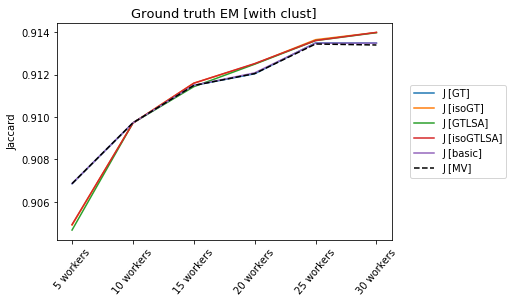

In [153]:
clustObj=clust_df.objid.unique()
df_withClust = df[(((df["clust"]==-1) &(df["objid"].isin(noClust_obj)))| ((df["clust"]!=-1) & (df["objid"].isin(clustObj))))]
df_withClust = df_withClust[(~df_withClust.objid.isin(small_area))]#& (~df_withClust.objid.isin([47]))]
Nworker_performance = df_withClust.groupby("num_workers").mean()
metric_J = [metric for metric in metric_keys if 'J' in metric ]
for algo in metric_J:
    if '[MV]' in algo:
        plt.plot(np.array(Nworker_performance[algo]),label=algo,color="black",linestyle="--")
    else:
        plt.plot(np.array(Nworker_performance[algo]),label=algo)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Ground truth EM [with clust]",fontsize=13)

Number of objects: 19


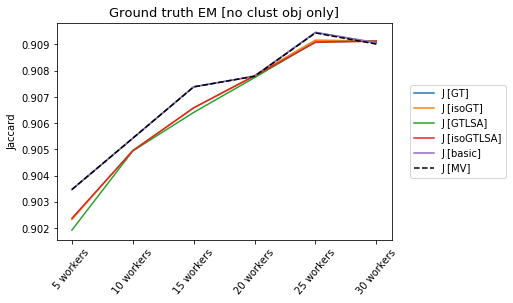

In [156]:
df_noClust = df[(df["clust"]==-1)]
df_noClust = df_noClust[(~df_noClust.objid.isin(small_area))]# & (~df_noClust.objid.isin([47]))]
print "Number of objects:",len(df_noClust.objid.unique())
Nworker_performance = df_noClust.groupby("num_workers").mean()
metric_J = [metric for metric in metric_keys if 'J' in metric ]
#Nworker_performance = Nworker_performance.reindex(['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0'])
# original "whole" MV PRJ for every object table --> MV_noClust : MV with no clustering

for algo in metric_J:
    if '[MV]' in algo:
        plt.plot(np.array(Nworker_performance[algo]),label=algo,color="black",linestyle="--")
    else:
        plt.plot(np.array(Nworker_performance[algo]),label=algo)

plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Ground truth EM [no clust obj only]",fontsize=13)

Number of objects: 21


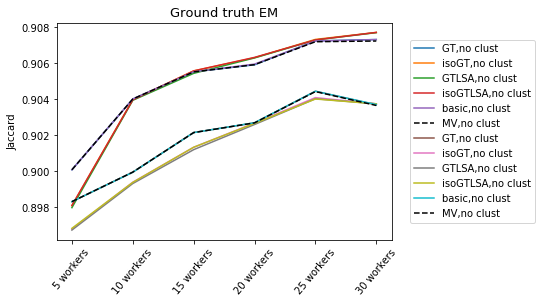

In [158]:
clustObj=clust_df.objid.unique()

df_withClust = df[(((df["clust"]==-1) &(df["objid"].isin(noClust_obj)))| ((df["clust"]!=-1) & (df["objid"].isin(clustObj))))]
Nworker_performance = df_withClust.groupby("num_workers").mean()
metric_J = [metric for metric in metric_keys if 'J' in metric ]
for algo in metric_J:
    if '[MV]' in algo:
        plt.plot(np.array(Nworker_performance[algo]),label=algo[3:-1]+",no clust",color="black",linestyle="--")
    else:
        plt.plot(np.array(Nworker_performance[algo]),label=algo[3:-1]+",no clust")
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Ground truth EM [with clust]",fontsize=13)
df_noClust = df[(df["clust"]==-1)]
print "Number of objects:",len(df_noClust.objid.unique())
Nworker_performance = df_noClust.groupby("num_workers").mean()
metric_J = [metric for metric in metric_keys if 'J' in metric ]
#Nworker_performance = Nworker_performance.reindex(['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0'])
# original "whole" MV PRJ for every object table --> MV_noClust : MV with no clustering

for algo in metric_J:
    if '[MV]' in algo:
        plt.plot(np.array(Nworker_performance[algo]),label=algo[3:-1]+",no clust",color="black",linestyle="--")
    else:
        plt.plot(np.array(Nworker_performance[algo]),label=algo[3:-1]+",no clust")

plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Ground truth EM",fontsize=13)

In [172]:
def plot_best_clust_thresh_metric(metric,gt="",includeObjs=[],plot_noClustMV=True):
    for algo in ['GTLSA',"basic","GT","isoGT","isoGTLSA"]:
        # we only ran on the best clusters, so the results should only be on the best clusters if not -1
        data =  pd.read_csv("pixel_em/{}{}_full_PRJ_table.csv".format(gt,algo))
        data = data[((data["clust"]==-1) &(data["objid"].isin(noClust_obj)))| ((data["clust"]!=-1) & data["objid"].isin(clustObj))]
        if includeObjs!=[]:
            data = data[data["objid"].isin(includeObjs)]
        #data = data[data["sample_num"]==0]
        plt.plot(data.groupby("num_workers").mean()[metric],label=algo)
#         if includeObjs!=[]:
#             try:
#                 assert len(data.objid.unique())==len(includeObjs)
#             except(AssertionError):
#                 print len(data.objid.unique()),len(includeObjs)
#         else:
#             assert len(data.objid.unique())==len(object_lst)
    MV = pd.read_csv("pixel_em/MV_full_PRJ_table.csv") 
    #MV = MV[MV["sample_num"]==0]
    # now need to filter based on best cluster
    MV = filter_best_clust(MV,best_clust_df)
    if includeObjs!=[]:
        MV = MV[MV["objid"].isin(includeObjs)]
    # select only the best cluster if clustered object -1 if not clustered
    MV_withClust = MV[((MV["clust"]==-1) &(MV["objid"].isin(noClust_obj)))| ((MV["clust"]!=-1) & MV["objid"].isin(clustObj))]
    plt.plot(MV_withClust.groupby("num_workers").mean()[metric],label="MV clust",color="cyan",linestyle="--")
    if plot_noClustMV:
        MV_noClust = MV[(MV["clust"]==-1) &(MV["objid"].isin(noClust_obj))].groupby("num_workers").mean()[metric]
        plt.plot(MV_noClust,label="MV no clust",color="black",linestyle="--")

    plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
    plt.ylabel(metric)
    plt.xticks(rotation=50)
    a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
    if gt:
        plt.title("Ground truth EM [best clust & thresh]",fontsize=13)
    else:
        plt.title("Binary Search Thresh EM [best clust & thresh]",fontsize=13)

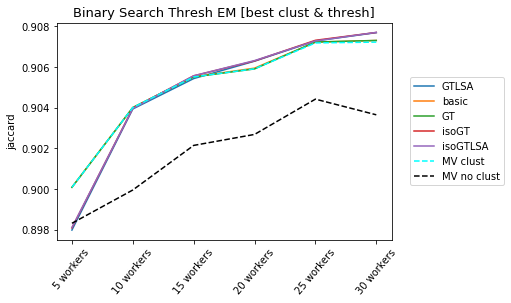

In [163]:
plot_best_clust_thresh_metric("jaccard")

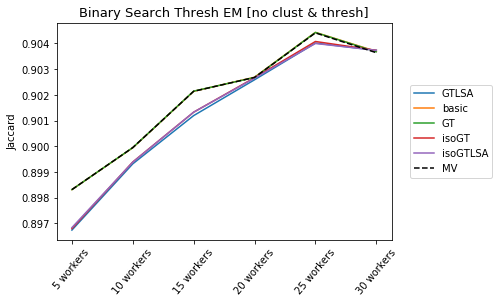

In [151]:
gt=""
MV = pd.read_csv("pixel_em/MV_full_PRJ_table.csv") 
worker_df = pd.read_csv("pixel_em/individual_worker_performance.csv")
worker_df = worker_df[worker_df["clust"]==-1]
raw_worker_performance = worker_df.groupby("num_workers").mean()
# plt.plot(raw_worker_performance["avrg_j"],label="average worker")
# plt.plot(raw_worker_performance["max_j"],label="best worker")

for algo in ['GTLSA',"basic","GT","isoGT","isoGTLSA"]:
    # we only ran on the best clusters, so the results should only be on the best clusters if not -1
    data =  pd.read_csv("pixel_em/{}{}_full_PRJ_table.csv".format(gt,algo))
    data = data[(data["clust"]==-1)& (data["objid"].isin(noClust_obj))]
    plt.plot(data.groupby("num_workers").mean()["jaccard"],label=algo)
    assert len(data.objid.unique())==len(noClust_obj)
# now need to filter based on best cluster
MV = filter_best_clust(MV,best_clust_df)
# select only the best cluster if clustered object -1 if not clustered
MV = MV[(MV["clust"]==-1) & (MV["objid"].isin(noClust_obj))]
plt.plot(MV.groupby("num_workers").mean()["jaccard"],label="MV",color="black",linestyle="--")

plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Binary Search Thresh EM [no clust & thresh]",fontsize=13)

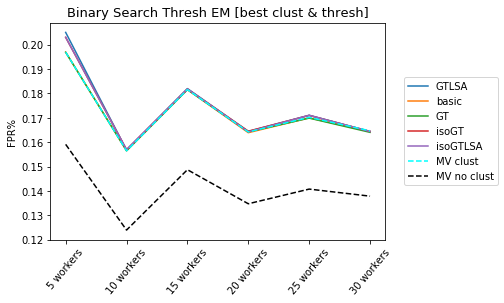

In [152]:
plot_best_clust_thresh_metric("FPR%")

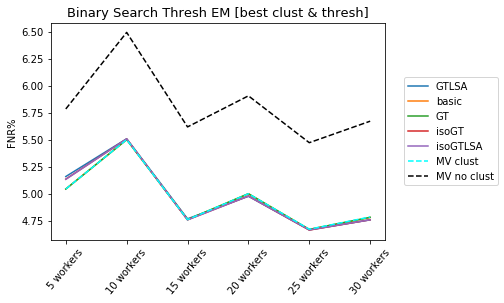

In [153]:
plot_best_clust_thresh_metric("FNR%")

# Task difficulty

In [164]:
object_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47]
type_one_task_ambiguity = [15,20,22,27,31,40,41,42,47] #wrong object annotation
type_two_task_ambiguity = [1,4,7,8,9,10,18,20,21,25,28,29,30,31,32,33,34,35] #missing region

all_hard_tasks = list(set(np.concatenate((type_one_task_ambiguity,type_two_task_ambiguity))))
easy_tasks = [objid  for objid in object_lst if objid not in all_hard_tasks]

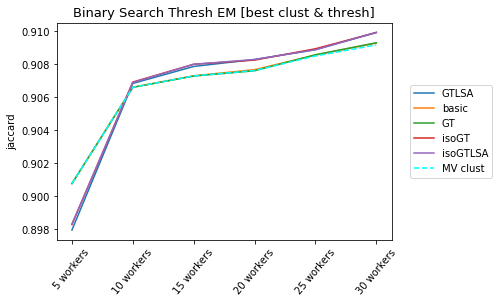

In [173]:
plot_best_clust_thresh_metric("jaccard",gt="",includeObjs=all_hard_tasks,plot_noClustMV=False)

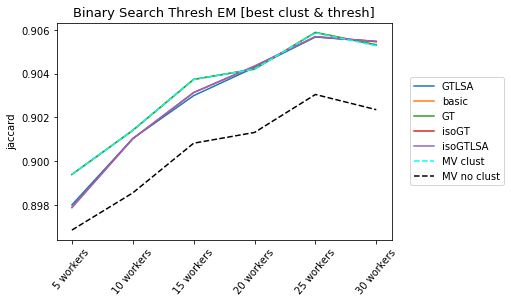

In [174]:
plot_best_clust_thresh_metric("jaccard",gt="",includeObjs=easy_tasks)

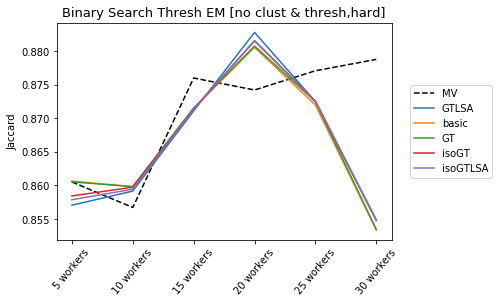

In [45]:
gt=""
MV = pd.read_csv("pixel_em/MV_full_PRJ_table.csv") 
# now need to filter based on best cluster
MV = filter_best_clust(MV,best_clust_df)
# select only the best cluster if clustered object -1 if not clustered
MV = MV[(MV["clust"]==-1)]
MV = MV[MV["objid"].isin(all_hard_tasks)]
plt.plot(MV.groupby("num_workers").mean()["jaccard"],label="MV",color="black",linestyle="--")
worker_df = pd.read_csv("pixel_em/individual_worker_performance.csv")
worker_df = worker_df[worker_df["clust"]==-1]
raw_worker_performance = worker_df.groupby("num_workers").mean()
# plt.plot(raw_worker_performance["avrg_j"],label="average worker")
# plt.plot(raw_worker_performance["max_j"],label="best worker")

for algo in ['GTLSA',"basic","GT","isoGT","isoGTLSA"]:
    # we only ran on the best clusters, so the results should only be on the best clusters if not -1
    data =  pd.read_csv("pixel_em/{}{}_full_PRJ_table.csv".format(gt,algo))
    data = data[(data["clust"]==-1)]
    data = data[data["objid"].isin(all_hard_tasks)]
    plt.plot(data.groupby("num_workers").mean()["jaccard"],label=algo)
    #assert len(data.objid.unique())==len(object_lst)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Binary Search Thresh EM [no clust & thresh,hard]",fontsize=13)

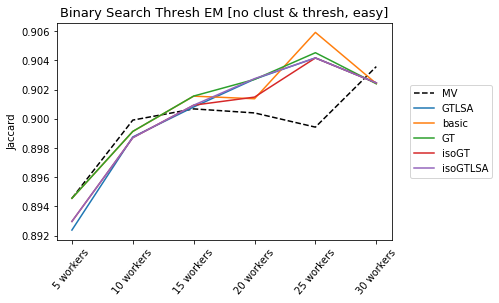

In [47]:
gt=""
MV = pd.read_csv("pixel_em/MV_full_PRJ_table.csv") 
# now need to filter based on best cluster
MV = filter_best_clust(MV,best_clust_df)
# select only the best cluster if clustered object -1 if not clustered
MV = MV[(MV["clust"]==-1)]
MV = MV[MV["objid"].isin(easy_tasks)]
plt.plot(MV.groupby("num_workers").mean()["jaccard"],label="MV",color="black",linestyle="--")
worker_df = pd.read_csv("pixel_em/individual_worker_performance.csv")
worker_df = worker_df[worker_df["clust"]==-1]
raw_worker_performance = worker_df.groupby("num_workers").mean()
# plt.plot(raw_worker_performance["avrg_j"],label="average worker")
# plt.plot(raw_worker_performance["max_j"],label="best worker")

for algo in ['GTLSA',"basic","GT","isoGT","isoGTLSA"]:
    # we only ran on the best clusters, so the results should only be on the best clusters if not -1
    data =  pd.read_csv("pixel_em/{}{}_full_PRJ_table.csv".format(gt,algo))
    data = data[(data["clust"]==-1)]
    data = data[data["objid"].isin(easy_tasks)]
    plt.plot(data.groupby("num_workers").mean()["jaccard"],label=algo)
    #assert len(data.objid.unique())==len(object_lst)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Binary Search Thresh EM [no clust & thresh, easy]",fontsize=13)

---------------------------------------------------------------------------

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from PixelEM import * 

Populating the interactive namespace from numpy and matplotlib


/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [32]:
sample_name = "5workers_rand0"
objid =5 
cluster_id = -1
do_EM_for(sample_name, objid, cluster_id="", rerun_existing=True)

Doing EM
Loading time: 0.700685024261
computing qj based on model
iteration: 0
Time for worker prob calculation: 9.53674316406e-07
{9: 0.9987109375, 143: 0.9987239583333334, 247: 0.998955078125, 270: 0.9993229166666666, 199: 0.9978157552083333}
Time for mask log prob calculation: 18.1870229244
----Trying threshold: 50.0 -----
1.0 1.0 1.0 200 -100.0
actual prj against GT (0.9599246906939215, 0.8814522104223265, 0.8501667460695569)
Time for binary search : 0.0298750400543
{9: 0.9987109375, 143: 0.9987239583333334, 247: 0.998955078125, 270: 0.9993229166666666, 199: 0.9978157552083333}
-->[0.9599246906939215, 0.8814522104223265, 0.8501667460695569]
jaccard_against_prev_gt_est: 1.0
computing qj based on model
iteration: 1
Time for worker prob calculation: 9.53674316406e-07
{9: 0.9987109375, 143: 0.9987239583333334, 247: 0.998955078125, 270: 0.9993229166666666, 199: 0.9978157552083333}
Time for mask log prob calculation: 20.8397750854
----Trying threshold: 50.0 -----
1.0 1.0 1.0 200 -100.0
a

In [31]:
sample_name = "5workers_rand0"
objid =5 
cluster_id = -1
do_EM_for(sample_name, objid, cluster_id="", rerun_existing=True,initMethod="0.6constant")

Doing EM
Loading time: 0.502712965012
starting with q=0.6
iteration: 0
Time for worker prob calculation: 0.0
{9: 0.6, 143: 0.6, 247: 0.6, 270: 0.6, 199: 0.6}
Time for mask log prob calculation: 18.2749049664
----Trying threshold: 50.0 -----
1.0 1.0 1.0 200 -100.0
actual prj against GT (0.9599246906939215, 0.8814522104223265, 0.8501667460695569)
Time for binary search : 0.0387060642242
{9: 0.6, 143: 0.6, 247: 0.6, 270: 0.6, 199: 0.6}
-->[0.9599246906939215, 0.8814522104223265, 0.8501667460695569]
jaccard_against_prev_gt_est: 0.0
computing qj based on model
iteration: 1
Time for worker prob calculation: 9.53674316406e-07
{9: 0.9987109375, 143: 0.9987239583333334, 247: 0.998955078125, 270: 0.9993229166666666, 199: 0.9978157552083333}
Time for mask log prob calculation: 14.7780439854
----Trying threshold: 50.0 -----
1.0 1.0 1.0 200 -100.0
actual prj against GT (0.9599246906939215, 0.8814522104223265, 0.8501667460695569)
Time for binary search : 0.0204899311066
{9: 0.9987109375, 143: 0.9987

In [ ]:
pixel_em/5workers_rand0/obj5/gt_est_mask_best_thresh_0.6constant.pkl  
pixel_em/5workers_rand0/obj5/p_not_in_mask_best_thresh_0.6constant.pkl
pixel_em/5workers_rand0/obj5/p_in_mask_best_thresh_0.6constant.pkl

In [10]:
gt_est = pkl.load(open("pixel_em/5workers_rand0/obj5/gt_est_mask_best_thresh_0.6constant.pkl"))

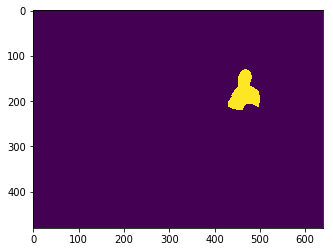

In [12]:
plt.imshow(gt_est)

In [13]:
faster_compute_prj(gt_est,get_gt_mask(5))

(0.9599246906939215, 0.8814522104223265, 0.8501667460695569)

In [14]:
cat pixel_em/5workers_rand0/obj5/MV_prj.json

[0.9599246906939215, 0.8814522104223265, 0.8501667460695569]

In [15]:
cat pixel_em/5workers_rand0/obj5/EM_prj_best_thresh.json

[0.9599246906939215, 0.8814522104223265, 0.8501667460695569]

In [33]:
sample_name = "10workers_rand0"
objid =10
cluster_id = -1
do_EM_for(sample_name, objid, cluster_id="", rerun_existing=True)

Doing EM
Loading time: 0.324685096741
computing qj based on model
iteration: 0
Time for worker prob calculation: 0.0
{260: 0.9969951923076923, 230: 0.9978170478170478, 140: 0.9982718295218295, 205: 0.9980866683991684, 142: 0.9989085239085239, 148: 0.9988760395010395, 149: 0.9989929833679834, 116: 0.9980736746361747, 218: 0.9953969594594595, 223: 0.9980639293139293}
Time for mask log prob calculation: 26.4102389812
----Trying threshold: 50.0 -----
0.995939813709 1.0 0.995939813709 200 -100.0
actual prj against GT (0.9812514927155481, 0.9742130535301441, 0.9564104056334749)
----Trying threshold: 12.5 -----
1.0 0.957254196643 0.957254196643 125.0 -100.0
actual prj against GT (0.9959917329492077, 0.9427351947359061, 0.9391720309454911)
----Trying threshold: -15.625 -----
1.0 0.996582733813 0.996582733813 68.75 -100.0
actual prj against GT (0.9848402815376286, 0.9704783923172684, 0.956194147538111)
----Trying threshold: 5.46875 -----
0.978988144148 1.0 0.978988144148 68.75 -57.8125
actual p

In [34]:
sample_name = "10workers_rand0"
objid = 10
cluster_id = -1
do_EM_for(sample_name, objid, cluster_id="", rerun_existing=True,initMethod="0.6constant")

Doing EM
Loading time: 0.715595006943
starting with q=0.6
iteration: 0
Time for worker prob calculation: 1.19209289551e-06
{260: 0.6, 230: 0.6, 140: 0.6, 205: 0.6, 142: 0.6, 148: 0.6, 149: 0.6, 116: 0.6, 218: 0.6, 223: 0.6}
Time for mask log prob calculation: 27.4085509777
----Trying threshold: 50.0 -----
0.993271005776 1.0 0.993271005776 200 -100.0
actual prj against GT (0.9789197880069076, 0.9745094552137056, 0.9544794751204785)
----Trying threshold: 5.0 -----
-1 0.0 0.0 35.0 -25.0
actual prj against GT (-1, 0.0, 0.0)
----Trying threshold: -4.0 -----
-1 0.0 0.0 2.0 -10.0
actual prj against GT (-1, 0.0, 0.0)
----Trying threshold: -2.5 -----
0.926924145596 1.0 0.926924145596 2.0 -7.0
actual prj against GT (0.9368157821617116, 0.9993479162961646, 0.9362434743974231)
----Trying threshold: -1.375 -----
0.956147893379 1.0 0.956147893379 2.0 -4.75
actual prj against GT (0.9584408139868157, 0.9911672298298654, 0.9503239740820735)
----Trying threshold: -0.53125 -----
0.978988144148 1.0 0.9789

In [35]:
cat pixel_em/10workers_rand0/obj10/MV_prj.json

[0.9829736211031175, 0.9719604007350762, 0.9558677782312132]

In [36]:
cat pixel_em/10workers_rand0/obj10/EM_prj_best_thresh.json

[0.9829736211031175, 0.9719604007350762, 0.9558677782312132]

In [38]:
sample_name = "10workers_rand0"
objid =10
cluster_id = 0
do_EM_for(sample_name, objid, cluster_id="", rerun_existing=True)

Doing EM
Loading time: 0.590570926666
computing qj based on model
iteration: 0
Time for worker prob calculation: 9.53674316406e-07
{260: 0.9969951923076923, 230: 0.9978170478170478, 140: 0.9982718295218295, 205: 0.9980866683991684, 142: 0.9989085239085239, 148: 0.9988760395010395, 149: 0.9989929833679834, 116: 0.9980736746361747, 218: 0.9953969594594595, 223: 0.9980639293139293}
Time for mask log prob calculation: 20.0065281391
----Trying threshold: 50.0 -----
0.995939813709 1.0 0.995939813709 200 -100.0
actual prj against GT (0.9812514927155481, 0.9742130535301441, 0.9564104056334749)
----Trying threshold: 12.5 -----
1.0 0.957254196643 0.957254196643 125.0 -100.0
actual prj against GT (0.9959917329492077, 0.9427351947359061, 0.9391720309454911)
----Trying threshold: -15.625 -----
1.0 0.996582733813 0.996582733813 68.75 -100.0
actual prj against GT (0.9848402815376286, 0.9704783923172684, 0.956194147538111)
----Trying threshold: 5.46875 -----
0.978988144148 1.0 0.978988144148 68.75 -57

In [37]:
sample_name = "10workers_rand0"
objid = 10
cluster_id = 0
do_EM_for(sample_name, objid, cluster_id="", rerun_existing=True,initMethod="0.6constant")

Doing EM
Loading time: 0.757363080978
starting with q=0.6
iteration: 0
Time for worker prob calculation: 0.0
{260: 0.6, 230: 0.6, 140: 0.6, 205: 0.6, 142: 0.6, 148: 0.6, 149: 0.6, 116: 0.6, 218: 0.6, 223: 0.6}
Time for mask log prob calculation: 41.2504489422
----Trying threshold: 50.0 -----
0.993271005776 1.0 0.993271005776 200 -100.0
actual prj against GT (0.9789197880069076, 0.9745094552137056, 0.9544794751204785)
----Trying threshold: 5.0 -----
-1 0.0 0.0 35.0 -25.0
actual prj against GT (-1, 0.0, 0.0)
----Trying threshold: -4.0 -----
-1 0.0 0.0 2.0 -10.0
actual prj against GT (-1, 0.0, 0.0)
----Trying threshold: -2.5 -----
0.926924145596 1.0 0.926924145596 2.0 -7.0
actual prj against GT (0.9368157821617116, 0.9993479162961646, 0.9362434743974231)
----Trying threshold: -1.375 -----
0.956147893379 1.0 0.956147893379 2.0 -4.75
actual prj against GT (0.9584408139868157, 0.9911672298298654, 0.9503239740820735)
----Trying threshold: -0.53125 -----
0.978988144148 1.0 0.978988144148 2.0 -

In [39]:
cat pixel_em/10workers_rand0/obj10/clust0/MV_prj.json

[0.9796076560729832, 0.9739166518465825, 0.9545639416652141]

In [40]:
sample_name = "30workers_rand0"
objid = 15
cluster_id = -1
do_EM_for(sample_name, objid, cluster_id="", rerun_existing=True,initMethod="0.6constant")

Doing EM
Loading time: 0.537504911423
starting with q=0.6
iteration: 0
Time for worker prob calculation: 0.0
{129: 0.6, 130: 0.6, 131: 0.6, 133: 0.6, 137: 0.6, 142: 0.6, 143: 0.6, 272: 0.6, 148: 0.6, 150: 0.6, 156: 0.6, 242: 0.6, 46: 0.6, 51: 0.6, 52: 0.6, 181: 0.6, 54: 0.6, 9: 0.6, 56: 0.6, 60: 0.6, 61: 0.6, 68: 0.6, 218: 0.6, 223: 0.6, 225: 0.6, 230: 0.6, 241: 0.6, 114: 0.6, 116: 0.6, 16: 0.6}
Time for mask log prob calculation: 82.1445829868
----Trying threshold: 50.0 -----
0.989492119089 1.0 0.989492119089 200 -100.0
actual prj against GT (0.8563922942206655, 0.9625984251968503, 0.8288135593220339)
----Trying threshold: 5.0 -----
-1 0.0 0.0 35.0 -25.0
actual prj against GT (-1, 0.0, 0.0)
----Trying threshold: -2.5 -----
1.0 0.787610619469 0.787610619469 20.0 -25.0
actual prj against GT (0.9662921348314607, 0.8464566929133859, 0.8221797323135756)
----Trying threshold: 3.125 -----
0.906902086677 1.0 0.906902086677 20.0 -13.75
actual prj against GT (0.8057784911717496, 0.9881889763779

In [41]:
cat pixel_em/30workers_rand0/obj15/MV_prj.json

[0.8654867256637168, 0.9625984251968503, 0.8373287671232876]

In [42]:
cat pixel_em/30workers_rand0/obj15/EM_prj_best_thresh.json

[0.8654867256637168, 0.9625984251968503, 0.8373287671232876]

In [56]:
data =  pd.read_csv("pixel_em/basic_full_PRJ_table.csv")
MV =  pd.read_csv("pixel_em/MV_full_PRJ_table.csv")
MV = filter_best_clust(MV,best_clust_df)

In [57]:
data.head()

,num_workers,sample_num,objid,thresh,clust,precision,recall,jaccard,FPR%,FNR%
0,25,0,1,best,0,0.984171,0.985411,0.970036,0.147678,1.458906
1,25,0,1,best,-1,0.986507,0.980102,0.967138,0.124904,1.989765
2,25,0,2,best,-1,0.956827,0.981829,0.940178,0.098156,1.817090
3,25,0,3,best,-1,0.954869,0.916754,0.878681,0.054385,8.324580
4,25,0,4,best,0,0.946651,0.946364,0.898446,0.057914,5.363636


In [58]:
MV.head()

,num_workers,sample_num,objid,thresh,clust,precision,recall,jaccard,FPR%,FNR%
0,25,0,1,best,0,0.984171,0.985411,0.970036,0.147678,1.458906
2,25,0,1,best,-1,0.986239,0.979873,0.966657,0.127395,2.012679
3,25,0,2,best,-1,0.956827,0.981829,0.940178,0.098156,1.817090
4,25,0,3,best,-1,0.954869,0.916754,0.878681,0.054385,8.324580
5,25,0,4,best,0,0.946651,0.946364,0.898446,0.057914,5.363636


In [59]:
sample_name = "25workers_rand0"
objid = 1
cluster_id = -1
do_EM_for(sample_name, objid, cluster_id="", rerun_existing=True,initMethod="0.6constant")

Doing EM
Loading time: 0.476587057114
starting with q=0.6
iteration: 0
Time for worker prob calculation: 0.0
{133: 0.6, 137: 0.6, 140: 0.6, 146: 0.6, 148: 0.6, 156: 0.6, 170: 0.6, 175: 0.6, 52: 0.6, 181: 0.6, 196: 0.6, 246: 0.6, 199: 0.6, 201: 0.6, 75: 0.6, 219: 0.6, 223: 0.6, 234: 0.6, 238: 0.6, 239: 0.6, 114: 0.6, 116: 0.6, 118: 0.6, 247: 0.6, 248: 0.6}
Time for mask log prob calculation: 93.3806948662
----Trying threshold: 50.0 -----
1.0 1.0 1.0 200 -100.0
actual prj against GT (0.98623870843744, 0.9798732050106935, 0.9666566196970838)
Time for binary search : 0.0327432155609
{133: 0.6, 137: 0.6, 140: 0.6, 146: 0.6, 148: 0.6, 156: 0.6, 170: 0.6, 175: 0.6, 52: 0.6, 181: 0.6, 196: 0.6, 246: 0.6, 199: 0.6, 201: 0.6, 75: 0.6, 219: 0.6, 223: 0.6, 234: 0.6, 238: 0.6, 239: 0.6, 114: 0.6, 116: 0.6, 118: 0.6, 247: 0.6, 248: 0.6}
-->[0.98623870843744, 0.9798732050106935, 0.9666566196970838]
jaccard_against_prev_gt_est: 0.0
computing qj based on model
iteration: 1
Time for worker prob calculat

Time for mask log prob calculation: 94.8385028839
----Trying threshold: 50.0 -----
0.998540538464 0.999384970209 0.997927302038 200 -100.0
actual prj against GT (0.9864039635902754, 0.9808661778185152, 0.9677820483834502)
----Trying threshold: 12.5 -----
1.0 0.973246204113 0.973246204113 125.0 -100.0
actual prj against GT (0.9942730755559066, 0.961426825542316, 0.956132021725094)
----Trying threshold: -15.625 -----
1.0 0.993426869114 0.993426869114 68.75 -100.0
actual prj against GT (0.9889336016096579, 0.9760922700886038, 0.9655459010200227)
----Trying threshold: 5.46875 -----
0.988449409172 1.0 0.988449409172 68.75 -57.8125
actual prj against GT (0.9813442759983282, 0.9864039107852124, 0.9682474226804124)
----Trying threshold: -10.3515625 -----
1.0 0.998885258505 0.998885258505 37.109375 -57.8125
actual prj against GT (0.9866466558916339, 0.9791857622975864, 0.9663789529229957)
----Trying threshold: 1.513671875 -----
0.993166373979 1.0 0.993166373979 37.109375 -34.08203125
actual prj

In [19]:
from useVision import *

In [22]:
sample_name="5workers_rand0"
objid=1
k=500
expand_thresh=0.8
contract_thresh=0.2
outdir = hybrid_dir(sample_name, objid, k, expand_thresh, contract_thresh)

In [25]:
hybrid_mask = pkl.load(open(outdir+"/MV_-1_hybrid_mask.pkl"))

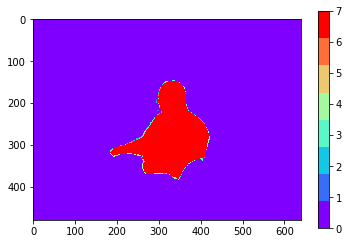

In [34]:
MV_mask = get_MV_mask(sample_name, objid)
gt_mask = get_gt_mask(objid)
    sum_mask = hybrid_mask.astype(int) * 1 + MV_mask.astype(int) * 2 + gt_mask.astype(int) * 4

    plt.figure()
    plt.imshow(sum_mask, interpolation="none",cmap=discrete_cmap(8, 'rainbow'))  # , cmap="rainbow")
    plt.colorbar()